# Assignment_04_Digital Humanities_Sentiment_Analysis


## In this assignment I plan on analyzing comments from the New York Times newspaper. More Specifically I will compare the emotional sentiment of the comments from april.2017 with april2018. 
## To start I will first conduct a topic modeling analysis in order to see what the most pressing topics are and then the sentiment analysis using the ANEW Dictionary. I also wanted to use the LIWC dictionary but the purchase of this dictionary is not for free. 


## I hypothesize that compared to 2017, the comments in 2018 will be more polarized. I base this analysis on findings from psychological theories such as the Affective Intelligence Theory by Marcus et al. (2002). 

## First some examples to get started

In [1]:
# I first need to load packages which will be used later
from textblob import TextBlob
import pandas as pd
import numpy as np
import pathlib

In [2]:
import matplotlib.pyplot as plt

In [3]:
import string
import nltk
from nltk.corpus import stopwords
import re

In [4]:
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords 
import string

#### As there are thousands of comments and I don’t have time to read through them all and would like to get the gist of the main discussion points.
#### I will be using the Topic modelling algorithm Latent Dirichlet Allocaiton (LDA) in order to get the main frames.

#### First I will have to load the data and get some insights about the datasets. Before comparing both datasets I will start with looking at only the first (april.2017). 

In [5]:
# load the csv file into a Pandas Dataframe called comments_2017
comments_2017 = pd.read_csv(r'C:\Users\Surya\Desktop\Cognitive Science\Semester 4_Master\Master_CogSci\analysis\SentimentAnalysis-master_dwzhou\SentimentAnalysis-master\data_newYork_times\CommentsApril2017\CommentsApril2017.csv')
comments_both = pd.read_csv(r'C:\Users\Surya\Desktop\Cognitive Science\Semester 4_Master\Master_CogSci\analysis\SentimentAnalysis-master_dwzhou\SentimentAnalysis-master\data_newYork_times\CommentsApril2017\CommentsApril2017.csv')
comments_2017.head(5)


C:\Users\Surya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,approveDate,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,parentID,...,userLocation,userTitle,userURL,inReplyTo,articleID,sectionName,newDesk,articleWordCount,printPage,typeOfMaterial
0,1491245186,This project makes me happy to be a 30+ year T...,22022598.0,22022598,<br/>,comment,1.491237e+09,1,False,0.0,...,"Riverside, CA",NaN,NaN,0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News
1,1491188619,Stunning photos and reportage. Infuriating tha...,22017350.0,22017350,NaN,comment,1.491180e+09,1,False,0.0,...,<br/>,NaN,NaN,0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News
2,1491188617,Brilliant work from conception to execution. I...,22017334.0,22017334,<br/>,comment,1.491179e+09,1,False,0.0,...,Raleigh NC,NaN,NaN,0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News
3,1491167820,NYT reporters should provide a contributor's l...,22015913.0,22015913,<br/>,comment,1.491150e+09,1,False,0.0,...,"Missouri, USA",NaN,NaN,0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News
4,1491167815,Could only have been done in print. Stunning.,22015466.0,22015466,<br/>,comment,1.491147e+09,1,False,0.0,...,"Tucson, Arizona",NaN,NaN,0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News


In [6]:
# get the comments from 2018
comments_2018 = pd.read_csv(r'C:\Users\Surya\Desktop\Cognitive Science\Semester 4_Master\Master_CogSci\analysis\SentimentAnalysis-master_dwzhou\SentimentAnalysis-master\data_newYork_times\CommentsApril2018\CommentsApril2018.csv')

comments_2018.head(5)

C:\Users\Surya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,...,status,timespeople,trusted,typeOfMaterial,updateDate,userDisplayName,userID,userLocation,userTitle,userURL
0,1524594282,5adf6684068401528a2aa69b,781.0,How could the league possibly refuse this offe...,26853969.0,26853969.0,<br/>,comment,1524594011,1.0,...,approved,1,0,News,1524594282,Christopher Rillo,46566740.0,San Francisco,NaN,NaN
1,1524594252,5adf6684068401528a2aa69b,781.0,"So then the execs can be like ""yeah...we will ...",26853699.0,26853699.0,<br/>,comment,1524593146,1.0,...,approved,1,0,News,1524594252,Matt Brand,64324866.0,"Williamsburg, Brooklyn",NaN,NaN
2,1524594250,5adf6684068401528a2aa69b,781.0,I would not want to play chess against these c...,26853677.0,26853677.0,<br/>,comment,1524593032,1.0,...,approved,1,0,News,1524594250,Joseph,78105093.0,"Fayetteville, AR",NaN,NaN
3,1524593431,5adf6684068401528a2aa69b,781.0,Could the cheerleaders join the Actors' Equity...,26853784.0,26853784.0,<br/>,comment,1524593426,1.0,...,approved,0,0,News,1524593431,Stephen,81939618.0,"Phoenix, AZ",NaN,NaN
4,1524595048,5adf653f068401528a2aa697,656.0,Seeking conclusions which support preconceived...,26854236.0,26854236.0,<br/>,comment,1524595043,1.0,...,approved,1,0,News,1524595048,Paul Zorsky,58642997.0,Texas,NaN,NaN


In [7]:
# Now the aim is to merge the vital columns. Basically I want to create one dataframe that has the comment body of both dataframe

## This is one fast way to just add a specific column to the main dataframe. 
# df1 = pd.DataFrame({"Letters": ["a", "b", "c"]})
# df2 = pd.DataFrame({"Letters": ["d", "e", "f"], "Numbers": [1, 2, 3]})
# numbers = df2["Numbers"]
# df1 = df1.join(numbers)

###  --> or even easier df1['columename']= df2['existing_colume_name']

comments_both["commentBody_2018"] = comments_2018["commentBody"]
comments_both.head()


,approveDate,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,parentID,...,userTitle,userURL,inReplyTo,articleID,sectionName,newDesk,articleWordCount,printPage,typeOfMaterial,commentBody_2018
0,1491245186,This project makes me happy to be a 30+ year T...,22022598.0,22022598,<br/>,comment,1.491237e+09,1,False,0.0,...,NaN,NaN,0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News,How could the league possibly refuse this offe...
1,1491188619,Stunning photos and reportage. Infuriating tha...,22017350.0,22017350,NaN,comment,1.491180e+09,1,False,0.0,...,NaN,NaN,0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News,"So then the execs can be like ""yeah...we will ..."
2,1491188617,Brilliant work from conception to execution. I...,22017334.0,22017334,<br/>,comment,1.491179e+09,1,False,0.0,...,NaN,NaN,0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News,I would not want to play chess against these c...
3,1491167820,NYT reporters should provide a contributor's l...,22015913.0,22015913,<br/>,comment,1.491150e+09,1,False,0.0,...,NaN,NaN,0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News,Could the cheerleaders join the Actors' Equity...
4,1491167815,Could only have been done in print. Stunning.,22015466.0,22015466,<br/>,comment,1.491147e+09,1,False,0.0,...,NaN,NaN,0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News,Seeking conclusions which support preconceived...


In [9]:
# Print out first 5 values of the comments from 2017 as DataFrame
print(comments_2017.iloc[0:5, 1])


0    This project makes me happy to be a 30+ year T...
1    Stunning photos and reportage. Infuriating tha...
2    Brilliant work from conception to execution. I...
3    NYT reporters should provide a contributor's l...
4       Could only have been done in print. Stunning. 
Name: commentBody, dtype: object


#### take a look at the number of characters present in each comment. This can provide me with a rough idea about the comment length.

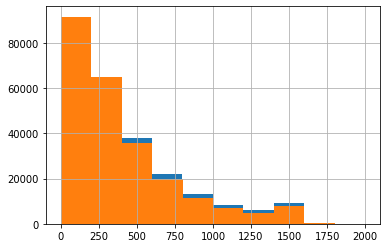

In [10]:
comments_both["commentBody"].str.len().hist() #also plot the comment length as histogram
comments_both["commentBody_2018"].str.len().hist()
 

#### We can see that most comments are very short. There is only a larger amount of used characters starting from 1300. This may be because these are comments that are more deliberate and thought through instead of purely short comments that primarily convey emotional feelings. Lets look at more details, such as most common words or the amount of words per comment. 
 
#### There also seems to be a threshold for when a length of a comment increases. Probably when there is truly more to say.

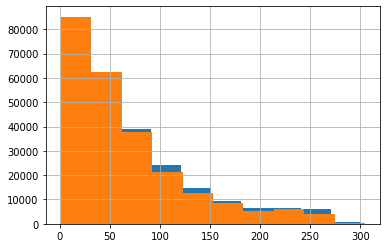

In [11]:
comments_both["commentBody"].str.split().map(lambda x: len(x)).hist() # plotting number of words appearing in each comment
comments_both["commentBody_2018"].str.split().map(lambda x: len(x)).hist()
# this does not provide me with more insighs but it becomes visible that most comments in online 
# forums appear to be rather short. 

### Create the corpus which might be used later for the sentiment analysis

In [15]:
corpus1 =[]
comments = comments_both["commentBody"].str.split()
comments = comments.values.tolist()
corpus1 = [word for i in comments for word in i]

In [16]:
# corpus for 2018 comments
corpus2 =[]
comments = comments_both["commentBody_2018"].str.split()
comments = comments.values.tolist()
corpus2 = [word for i in comments for word in i]

In [14]:
print(corpus[0:200]) #look at the first 200 words from the comments corpus

['This', 'project', 'makes', 'me', 'happy', 'to', 'be', 'a', '30+', 'year', 'Times', 'subscriber...', 'continue', 'to', 'innovate', 'across', 'all', 'platforms,', 'please.', 'Stunning', 'photos', 'and', 'reportage.', 'Infuriating', 'that', 'the', 'Trump', "admistration's", 'draconian', 'reinstatement', 'of', 'the', 'global', 'gag', 'order', 'will', 'prevent', 'men', 'and', 'women', 'from', 'receiving', 'appropriate', 'family', 'planning', 'advice,', 'so', 'obviously', 'desperately', 'needed.', 'Brilliant', 'work', 'from', 'conception', 'to', 'execution.', "I've", 'never', 'seen', 'anything', 'like', 'it.', 'As', 'a', 'paper', 'of', 'record', 'it', 'is', 'important', 'to', 'leave', 'a', 'record', 'of', 'these', 'and', 'other', 'peoples', 'for', 'whom', 'no', 'one', 'else', 'speaks.', 'Please', 'keep', 'humanizing', 'what', 'are', 'otherwise', 'bland', 'statistics.', 'It', 'matters.', 'Time', 'and', 'again', 'their', 'stories', 'sounded', 'like', 'mine,', 'could', 'have', 'been', 'mine.'

In [21]:
print(corpus2[0:200])

['How', 'could', 'the', 'league', 'possibly', 'refuse', 'this', 'offer?', 'So', 'then', 'the', 'execs', 'can', 'be', 'like', '"yeah...we', 'will', 'sit', 'down', 'and', 'listen', 'to', 'you".', 'and', 'then', 'do', 'nothing.', 'Suit', 'settled.', 'I', 'would', 'not', 'want', 'to', 'play', 'chess', 'against', 'these', "cheerleaders'", 'lawyers...nice', 'move!', 'Could', 'the', 'cheerleaders', 'join', 'the', "Actors'", 'Equity', 'Association', 'or', 'another', 'similar', 'performance', 'union?', 'An', 'effort', 'for', 'collective', 'representation', 'would', 'do', 'much', 'more', 'to', 'address', 'cheerleader', 'pay', 'and', 'working', 'conditions', 'than', 'a', 'few', 'hour', 'meeting', 'with', 'Roger', 'Goodell.', 'Seeking', 'conclusions', 'which', 'support', 'preconceived', 'ideas', 'and', 'discarding', 'the', 'data', 'which', 'does', 'not', 'is', 'Mr.', "Pruitt's", 'idea', 'of', 'science.', 'We', 'would', 'still', 'be', 'in', 'the', 'dark', 'ages', 'using', 'this', 'approach.', 'Scie

#### Load Stopwords

In [8]:
#import nltk
nltk.download('stopwords')
stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Surya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
from collections import Counter
from collections import defaultdict

<BarContainer object of 10 artists>

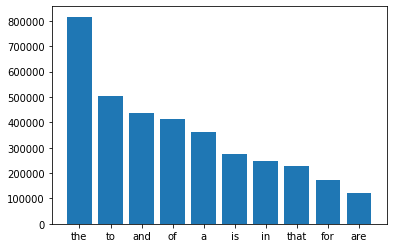

In [17]:
dic = defaultdict(int)  ## plots the top 10 stopwords to see which ones I might want to get rid of later. 
for word in corpus1:
    if word in stop:
        dic[word] += 1
top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y = zip(*top)
plt.bar(x,y)

### Now I proceed with the topic model

#### The first step is to properly clean the text. Thus do some Pre-processing of the text data. This process of converting data to something a computer can understand is referred to as pre-processing. These steps include setting all words to lowercase, removing punctuation and stopwords, and stemming (reducing the words to their root form). For this I will use a function and the SnowballStemmer from the nltk package. 

In [10]:
# load the needed stemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords 
import string

In [11]:
# NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages.
print(stopwords.words('english')) # look at the list (which can also be modified)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
# I will use the english list of stopwords and asign them to a variable. 
stop_words = stopwords.words("english")

In [13]:
# now build the function which I will call tokenizer
# this essentially cleans the text from upper to lower case, removes punctuations and stopwords and stems the text. 
# another option would be to use the nltk tokenizer https://www.nltk.org/api/nltk.tokenize.html 

def tokenizer(text):
    '''
    -covert everything to lowercase
    -remove punctuations
    -remove stopwords
    -stemmer
    '''
    #All characters in this string will be converted to lowercase
    text = text.lower()
    
    #Removing sentence punctuations
    for punctuation_mark in string.punctuation:
        text = text.replace(punctuation_mark,'')
    
    #Creating our list of tokens
    list_of_tokens = text.split(' ')
    #Creating our cleaned tokens list 
    cleaned_tokens = []
    #Let us use a stemmer
    stemmer = SnowballStemmer(language = 'english')
    
    #Removing Stop Words in our list of tokens and any tokens that happens to be empty strings
    for token in list_of_tokens:
        if (not token in stop_words) and (token != ''):
            #Stem tokens
            token_stemmed = stemmer.stem(token)
            #appending our finalized cleaned token
            cleaned_tokens.append(token_stemmed)
    
    return cleaned_tokens
            


#### Now I try to clean the text in the proper way and add it to a new column in my dataframe (called "pp_text_2017" and "pp_text_2018)

In [14]:
# for the comments of 2017
# apply the tokenizer function to the commentBody column and asign it to a new pre-processed column pp_text_2017
comments_both["pp_text_2017"] = comments_both["commentBody"].apply(tokenizer)
# but what it creates is a sequence of sequences (quasi lists with strings in them)

In [15]:
# same for the comments of 2018
comments_both["pp_text_2018"] = comments_both["commentBody_2018"].apply(tokenizer)

In [42]:
comments_both.head(5) #look if the new column was added 

,approveDate,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,parentID,...,sectionName,newDesk,articleWordCount,printPage,typeOfMaterial,commentBody_2018,pp_text_2017,pp_text_2018,comments_2017,comments_2018
0,1491245186,This project makes me happy to be a 30+ year T...,22022598.0,22022598,<br/>,comment,1.491237e+09,1,False,0.0,...,Unknown,Insider,716.0,2,News,How could the league possibly refuse this offe...,"[project, make, happi, 30, year, time, subscri...","[could, leagu, possibl, refus, offer]",project make happi 30 year time subscrib conti...,could leagu possibl refus offer
1,1491188619,Stunning photos and reportage. Infuriating tha...,22017350.0,22017350,NaN,comment,1.491180e+09,1,False,0.0,...,Unknown,Insider,716.0,2,News,"So then the execs can be like ""yeah...we will ...","[stun, photo, reportag, infuri, trump, admistr...","[exec, like, yeahw, sit, listen, noth, suit, s...",stun photo reportag infuri trump admistr draco...,exec like yeahw sit listen noth suit settl
2,1491188617,Brilliant work from conception to execution. I...,22017334.0,22017334,<br/>,comment,1.491179e+09,1,False,0.0,...,Unknown,Insider,716.0,2,News,I would not want to play chess against these c...,"[brilliant, work, concept, execut, ive, never,...","[would, want, play, chess, cheerlead, lawyersn...",brilliant work concept execut ive never seen a...,would want play chess cheerlead lawyersnic move
3,1491167820,NYT reporters should provide a contributor's l...,22015913.0,22015913,<br/>,comment,1.491150e+09,1,False,0.0,...,Unknown,Insider,716.0,2,News,Could the cheerleaders join the Actors' Equity...,"[nyt, report, provid, contributor, link, crowd...","[could, cheerlead, join, actor, equiti, associ...",nyt report provid contributor link crowdfund p...,could cheerlead join actor equiti associ anoth...
4,1491167815,Could only have been done in print. Stunning.,22015466.0,22015466,<br/>,comment,1.491147e+09,1,False,0.0,...,Unknown,Insider,716.0,2,News,Seeking conclusions which support preconceived...,"[could, done, print, stun]","[seek, conclus, support, preconceiv, idea, dis...",could done print stun,seek conclus support preconceiv idea discard d...


In [43]:
comments_both.tail(5)

,approveDate,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,parentID,...,sectionName,newDesk,articleWordCount,printPage,typeOfMaterial,commentBody_2018,pp_text_2017,pp_text_2018,comments_2017,comments_2018
243827,1493061963,"Sorry, but pudding has nothing to do with it; ...",22257227.0,22257227,<br/>,userReply,1.493059e+09,2,False,22255279.0,...,Unknown,Culture,981.0,2,Review,"Clearly, if there is going to be a change, it'...","[sorri, pud, noth, desert, one, deserv, henc, ...","[clear, go, chang, customersbrnot, sure, mani,...",sorri pud noth desert one deserv henc singl,clear go chang customersbrnot sure mani women ...
243828,1493060948,"While it would be quite punny to spell it ""des...",22257466.0,22257466,<br/>,userReply,1.493061e+09,2,False,22255279.0,...,Unknown,Culture,981.0,2,Review,"Since '90's, I have stop promoting Nike and Mi...","[would, quit, punni, spell, dessert, phrase, d...","[sinc, 90s, stop, promot, nike, michael, jorda...",would quit punni spell dessert phrase desert t...,sinc 90s stop promot nike michael jordan sneak...
243829,1493087619,"See above comments. ""deserts"" is the proper.",22259265.0,22259265,<br/>,userReply,1.493076e+09,2,False,22253014.0,...,Unknown,Culture,981.0,2,Review,Bet/cha they went with their pensions intact,"[see, comment, desert, proper]","[betcha, went, pension, intact]",see comment desert proper,betcha went pension intact
243830,1493042801,John Rubinstein had two brief scenes with Joan...,22250099.0,22250099,<br/>,userReply,1.493019e+09,2,False,22249901.0,...,Unknown,Culture,981.0,2,Review,All of these women need to sue the Head of Hum...,"[john, rubinstein, two, brief, scene, joan, cr...","[women, need, sue, head, human, resourc, abus,...",john rubinstein two brief scene joan crawford ...,women need sue head human resourc abus neglect...
243831,1493042800,"Ye gods and little fishes, Stu, you're right ....",22252040.0,22252040,<br/>,userReply,1.493039e+09,2,False,22249901.0,...,Unknown,Culture,981.0,2,Review,"Remember, this is the same corporation who con...","[ye, god, littl, fish, stu, your, right, memor...","[rememb, corpor, continu, sponsor, ben, roethl...",ye god littl fish stu your right memori serv p...,rememb corpor continu sponsor ben roethlisberg...


In [25]:
comments_both.info() 
# to see what the datatype of the key variables/columns are--> They are string which is good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243832 entries, 0 to 243831
Data columns (total 37 columns):
approveDate              243832 non-null int64
commentBody              243832 non-null object
commentID                243832 non-null float64
commentSequence          243832 non-null int64
commentTitle             228498 non-null object
commentType              243832 non-null object
createDate               243832 non-null float64
depth                    243832 non-null int64
editorsSelection         243832 non-null bool
parentID                 243832 non-null float64
parentUserDisplayName    70527 non-null object
permID                   243832 non-null object
picURL                   243832 non-null object
recommendations          243832 non-null float64
recommendedFlag          0 non-null float64
replyCount               243832 non-null float64
reportAbuseFlag          0 non-null float64
sharing                  243832 non-null int64
status                   243832 non

#### But as the pre-procesed columns are sequences of sequences I will run into problems later when using the TfidfVectorizer. This is why I need to transform the datatype from list to text with a function




In [17]:
# function to transform list objects to text objects
def list2text(my_list):
    return ' '.join(my_list)

In [18]:
comments_both['comments_2017'] = comments_both.pp_text_2017.apply(list2text) #apply the list2text function and asign to new column
comments_both['comments_2018'] = comments_both.pp_text_2018.apply(list2text)

In [19]:
comments_both.head() #the comments columns are now normal strings and not lists

,approveDate,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,parentID,...,sectionName,newDesk,articleWordCount,printPage,typeOfMaterial,commentBody_2018,pp_text_2017,pp_text_2018,comments_2017,comments_2018
0,1491245186,This project makes me happy to be a 30+ year T...,22022598.0,22022598,<br/>,comment,1.491237e+09,1,False,0.0,...,Unknown,Insider,716.0,2,News,How could the league possibly refuse this offe...,"[project, make, happi, 30, year, time, subscri...","[could, leagu, possibl, refus, offer]",project make happi 30 year time subscrib conti...,could leagu possibl refus offer
1,1491188619,Stunning photos and reportage. Infuriating tha...,22017350.0,22017350,NaN,comment,1.491180e+09,1,False,0.0,...,Unknown,Insider,716.0,2,News,"So then the execs can be like ""yeah...we will ...","[stun, photo, reportag, infuri, trump, admistr...","[exec, like, yeahw, sit, listen, noth, suit, s...",stun photo reportag infuri trump admistr draco...,exec like yeahw sit listen noth suit settl
2,1491188617,Brilliant work from conception to execution. I...,22017334.0,22017334,<br/>,comment,1.491179e+09,1,False,0.0,...,Unknown,Insider,716.0,2,News,I would not want to play chess against these c...,"[brilliant, work, concept, execut, ive, never,...","[would, want, play, chess, cheerlead, lawyersn...",brilliant work concept execut ive never seen a...,would want play chess cheerlead lawyersnic move
3,1491167820,NYT reporters should provide a contributor's l...,22015913.0,22015913,<br/>,comment,1.491150e+09,1,False,0.0,...,Unknown,Insider,716.0,2,News,Could the cheerleaders join the Actors' Equity...,"[nyt, report, provid, contributor, link, crowd...","[could, cheerlead, join, actor, equiti, associ...",nyt report provid contributor link crowdfund p...,could cheerlead join actor equiti associ anoth...
4,1491167815,Could only have been done in print. Stunning.,22015466.0,22015466,<br/>,comment,1.491147e+09,1,False,0.0,...,Unknown,Insider,716.0,2,News,Seeking conclusions which support preconceived...,"[could, done, print, stun]","[seek, conclus, support, preconceiv, idea, dis...",could done print stun,seek conclus support preconceiv idea discard d...


In [31]:
# print out the first few rows of the cleaned text column
print(comments_both.loc[0:10, ['comments_2018']]) # seems to work ok

                                        comments_2018
0                     could leagu possibl refus offer
1          exec like yeahw sit listen noth suit settl
2     would want play chess cheerlead lawyersnic move
3   could cheerlead join actor equiti associ anoth...
4   seek conclus support preconceiv idea discard d...
5   pruitt first elimin scientist elimin sciencebr...
6   shame attack environ research use human subjec...
7   “it give peopl opportun real time peer review ...
8   given recent revel mr pruitt motiv long held m...
9   love review without want actual eat anyth serv...
10  paulbrbrhav differ perspect andor opinion make...


#### Before proceeding I now need to convert the text data into a term-frequency inverse document matrix (TF-IDF) which is used to convert sentences into vectors in order to get some semantic understanding. <p> To be more precise the term frequency (TF) part is made out of:</p> 
TF = Number of repetition of words in doc or sentence / number of words in sentence or doc

IDF = Log of number of sentences / Number of sentences containing the word

--> Aim: get the importance of a word in a sentence or document. This is vital to find out the most essential documents for a certain word. It helps to get the order of importance to identify clusters. 

In Sum TF-IDF  looks for a word freq in a single text, respectively to that words use across the corpus as a whole. It is a way of finding out the degree to which a term say "violence" is used in a document relative to other documents. 
    

In [32]:
# I will use tfidVectorizer of the package sklearn to convert a collection of raw documents to a matrix of TF-IDF features.
# This will compute tf-idf scores on all documents in my dataframe.
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
# lets look at the column i need to analyze
print(comments_both.comments_2017)
# I have 243.832 comments and the datatype is string(object)

0         project make happi 30 year time subscrib conti...
1         stun photo reportag infuri trump admistr draco...
2         brilliant work concept execut ive never seen a...
3         nyt report provid contributor link crowdfund p...
4                                     could done print stun
                                ...                        
243827          sorri pud noth desert one deserv henc singl
243828    would quit punni spell dessert phrase desert t...
243829                            see comment desert proper
243830    john rubinstein two brief scene joan crawford ...
243831    ye god littl fish stu your right memori serv p...
Name: comments_2017, Length: 243832, dtype: object


In [66]:
# intitiate TF-IDF Vectorizer
tfidf = TfidfVectorizer()

#### as there was an index error with the LDA function I try this as an alternative. I cannot use one dataframe for both when I want to apply the lda function on the text data. So I need to do it seperately for each year dataframe. 

In [26]:
comments_2017["pp_text"] = comments_2017["commentBody"].apply(tokenizer)

KeyboardInterrupt: 

In [25]:
comments_2017['new_text'] = comments_2017.pp_text.apply(list2text)

AttributeError: 'DataFrame' object has no attribute 'pp_text'

In [67]:
#token_matrix = tfidf.fit_transform(comments_2017.commentBody)
token_matrix_2017 = tfidf.fit_transform(comments_2017.new_text)
token_matrix

<243832x288536 sparse matrix of type '<class 'numpy.float64'>'
	with 8014149 stored elements in Compressed Sparse Row format>

In [51]:
# same thing but with 2018

comments_2018["pp_text"] = comments_2018["commentBody"].apply(tokenizer)

In [52]:
comments_2018['new_text'] = comments_2018.pp_text.apply(list2text)

In [55]:
token_matrix_2018 = tfidf.fit_transform(comments_2018.new_text) #for the 2018 comments
token_matrix_2018

<264924x264791 sparse matrix of type '<class 'numpy.float64'>'
	with 8159405 stored elements in Compressed Sparse Row format>

In [68]:
feature_names = tfidf.get_feature_names() #or also token names
feature_names[0:20]

['00',
 '000',
 '000000000000001',
 '00000001',
 '0000001',
 '000000305',
 '0000004',
 '000000s',
 '000001',
 '000004',
 '00001',
 '0000305',
 '00004',
 '00005',
 '00009',
 '0001',
 '0001brbrwhi',
 '0002',
 '0003',
 '0004']

#### Topic Modeling with LDA (Latent Dirichlet Allocation): algorithm used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model. 

### Topic models for the comments of 2017. 
#### once with 10 topics and 20 words per topic and once with 8 topics and 15 words per topic

In [70]:
# First with 10 topics and 20 words per topic

# Import LDA topic modelling plugin from sklearn
from sklearn.decomposition import LatentDirichletAllocation as LDA #LDA algorithm will be applied

# I want 10 topics generated  
num_topics = 10

# instatiate LDA model
lda_model = LDA(n_components = num_topics, n_jobs = 1)
lda_model.fit(token_matrix_2017) #fit the tf_idf matrix and apply lda on the 2017 comments

# Looking for the top 20 words for each topic
top_n_words = 20

# Enumerate() method adds a counter to an iterable and returns it in a form of enumerate object. 
# This enumerate object can then be used directly in for loops or be converted into a list of tuples using list() method.
for topic_num, topic in enumerate (lda_model.components_):
    top_tokens = [feature_names[i] for i in topic.argsort()][::-1][:top_n_words] # #Returns the indices that would sort an array. I use the token or feature names from my tf-idf matrix
    top_n = ', '.join(top_tokens) 
    print(f'Topic {topic_num}: {top_n}')    

Topic 0: bravo, feather, bird, kendal, rattlesnak, yay, truer, laughingstock, jenner, chez, denni, misspel, cur, burk, southi, nous, hee, baja, eisenberg, mol
Topic 1: tax, unit, airlin, pay, passeng, would, get, fli, peopl, flight, us, compani, need, money, job, corpor, like, work, busi, go
Topic 2: candi, cotton, cemeteri, sell, graveyard, brtrump, grave, taser, ouch, edgar, nhl, citat, unit, cpd, fixx, jest, dvr, elmer, sceptic, 124
Topic 3: chemic, assad, weapon, syrian, syria, yes, attack, reid, bomb, gas, harri, rebel, civilian, russia, garland, isi, sarin, russian, missil, gorsuch
Topic 4: tax, deduct, incom, loan, cut, rate, pay, medic, cancer, statin, diet, diabet, bracket, elimin, amt, sugar, patient, lower, debt, diseas
Topic 5: deer, parad, bucket, cross, splash, band, brilliant, road, water, dress, march, flower, pictur, tradit, photoshop, herd, skunk, wear, kakistocraci, look
Topic 6: exact, lock, lol, shark, deja, riddanc, vu, petoskey, asol, pea, brbra, brhe, veep, cobr

#### Now with 8 topics and 15 words per topic. The reason for using less topics is that there was too much of an overlap between some topics. 

In [57]:
# First with 8 topics and 15 words per topic


# Import LDA topic modelling plugin from sklearn
from sklearn.decomposition import LatentDirichletAllocation as LDA #LDA algorithm will be applied

# I want 8 topics generated  
num_topics = 8

# instatiate LDA model
lda_model = LDA(n_components = num_topics, n_jobs = 1)
lda_model.fit(token_matrix_2017) #fit the tf_idf matrix and apply lda on the 2017 comments

# Looking for the top 15 words for each topic
top_n_words = 15

# Enumerate() method adds a counter to an iterable and returns it in a form of enumerate object. 
# This enumerate object can then be used directly in for loops or be converted into a list of tuples using list() method.
for topic_num, topic in enumerate (lda_model.components_):
    top_tokens = [feature_names[i] for i in topic.argsort()][::-1][:top_n_words] # #Returns the indices that would sort an array. I use the token or feature names from my tf-idf matrix
    top_n = ', '.join(top_tokens) 
    print(f'Topic {topic_num}: {top_n}')    

Topic 0: airlin, unit, passeng, flight, fli, seat, plane, custom, overbook, employe, board, crew, ticket, ual, munoz
Topic 1: bird, feather, congratul, iodin, python, riddanc, ditto, monti, soylent, brbra, asol, brtrump, twobit, yay, h2b
Topic 2: amen, di, bravo, modica, bull, fearless, trey, sculptur, girl, arturo, lara, hrefhttpsemcphdwordpresscom, targetblankhttpsemcphdwordpresscoma, titlehttpsemcphdwordpresscom, hyena
Topic 3: harri, reid, brilliant, bingo, lol, garland, sotomayor, nail, kagan, thank, merrick, scorpion, gorsuch, deja, vu
Topic 4: candi, grave, cotton, cemeteri, graveyard, pictur, man, tombston, flower, sell, notebook, graveston, look, festiv, bag
Topic 5: tax, peopl, would, get, pay, like, work, year, one, go, make, need, dont, time, money
Topic 6: korea, north, weapon, china, war, nuclear, korean, missil, bomb, chemic, kim, assad, syria, yes, south
Topic 7: trump, peopl, presid, would, one, like, us, time, think, get, republican, vote, right, make, dont


### Topic models for the comments of 2018. 
#### once with 10 topics and 20 words per topic and once with 8 topics and 20 words per topic

In [58]:
# First with 10 topics and 20 words per topic

# Import LDA topic modelling plugin from sklearn
from sklearn.decomposition import LatentDirichletAllocation as LDA #LDA algorithm will be applied

# I want 10 topics generated  
num_topics = 10

# instatiate LDA model
lda_model = LDA(n_components = num_topics, n_jobs = 1)
lda_model.fit(token_matrix_2018) #fit the tf_idf matrix and apply lda on the 2017 comments

# Looking for the top 20 words for each topic
top_n_words = 20

# Enumerate() method adds a counter to an iterable and returns it in a form of enumerate object. 
# This enumerate object can then be used directly in for loops or be converted into a list of tuples using list() method.
for topic_num, topic in enumerate (lda_model.components_):
    top_tokens = [feature_names[i] for i in topic.argsort()][::-1][:top_n_words] # #Returns the indices that would sort an array. I use the token or feature names from my tf-idf matrix
    top_n = ', '.join(top_tokens) 
    print(f'Topic {topic_num}: {top_n}')    

Topic 0: elsebrar, lamedvavnik, radiationbrsupernova, inuit, extremey, statisticsth, countryunredeem, rolebrgood, millionairestooligarch, placebrbrwhen, icbmsand, 799brusa, dontbrdont, brpear, nontrivi, garlandbrh, idealsbrpresid, behindbrbrth, somethingbrmov, nontang
Topic 1: semir, diplomacyspecif, goldbr, improvedbrbrwhen, machinebrnow, onhigh, staminapres, groupbrwho, contiu, fencesit, titlehttpswwwnytimescom20170828climatehowhurricaneharveybecamesodestructivehtmlmcubz1, alinski, rubblebrth, decisionbrbrth, goodbyebrproverbi, morrissey, capitalismbrbrdont, goalsbrbrsom, historyno, bybrthough
Topic 2: continentalwid, hiphopbrfor, jobbik, solkatron, sectiondoesnt, brbrtheskimm, titlehttpswwwcensusgovcontentdamcensuslibrarypublications2016demop20578pdf, providea, titlehttpswwwcbogovpublication52493, enron, prosecutionbrbrth, credibilitybrbrgorsuch, targetblankhttpwwwpoliticocomstory201704gorsuchwritingssupremecourt236891a, shameless, puncher, obligations, numbersbrexcel, cutlik, credi

In [59]:
# First with 8 topics and 20 words per topic


# Import LDA topic modelling plugin from sklearn
from sklearn.decomposition import LatentDirichletAllocation as LDA #LDA algorithm will be applied

# I want 8 topics generated  
num_topics = 8

# instatiate LDA model
lda_model = LDA(n_components = num_topics, n_jobs = 1)
lda_model.fit(token_matrix_2018) #fit the tf_idf matrix and apply lda on the 2017 comments

# Looking for the top 20 words for each topic
top_n_words = 20

# Enumerate() method adds a counter to an iterable and returns it in a form of enumerate object. 
# This enumerate object can then be used directly in for loops or be converted into a list of tuples using list() method.
for topic_num, topic in enumerate (lda_model.components_):
    top_tokens = [feature_names[i] for i in topic.argsort()][::-1][:top_n_words] # #Returns the indices that would sort an array. I use the token or feature names from my tf-idf matrix
    top_n = ', '.join(top_tokens) 
    print(f'Topic {topic_num}: {top_n}')    

Topic 0: gainbra, hrefhttpwwwnytimescom20120106worldamericasmigrantsnewpathsreshapinglatinamericahtml, notbrlw4, presidentbrbreven, incorrectlybrbrgoogl, nicebrbrrecip, tortureon, oliar, moviego, thatbrnot, titlehttpswwwnytimescominteractive20160811magazineisismiddleeastarabspringfracturedlandshtmlr0, itinde, jeaporad, bestfriend, altogetherbrbri, congressmanjohn, relationsbrth, malachi, blamedismiss, sadbrbrand
Topic 1: notbrlw4, itinde, moviego, tortureon, todaytomorrow, flyboy, kingsbrbrthes, thatbrnot, starsbrher, matchedbrbrth, didbrbrfast, traumat, titlewwwlaregledujeuorg, quaver, stonebrbrth, knowsand, forbrthat, jeaporad, nonsed, timebrbr2
Topic 2: bombbrbrgood, longerbrperhap, capitalismbrbrne, juicesbrbrfor, iscrazi, transactionbrnot, depend, shameless, targetblankhttpswwwyoutubecomwatchv49j47ou2rd8abrbrth, koreass, titlehttpswwwcensusgovcontentdamcensuslibrarypublications2016demop20578pdf, symptomless, disgard, titlehttpswwwcbogovpublication52493, lamedvavnik, kellysam, impr

#### Visualizing topics generated by the LDA model with the pyLDAvis plugin: The pyLDAvis plugin generates an interactive plot, which in my opinion makes easier for me in analyzing the various topics generated as well as how well my LDA model performed.

In [60]:
#Import visualization tools for LDA models
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

C:\Users\Surya\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [71]:
#  visualize these topics
pyLDAvis.sklearn.prepare(lda_model, token_matrix_2017, tfidf) 
#doing this with different lda_models and token matrices reveals great insights into the main topics.  


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.429506 -0.040958       1        1  66.745038
1      0.298316  0.054305       2        1  14.092031
4     -0.036647  0.052236       3        1   2.561366
8     -0.097681  0.002579       4        1   2.557389
9     -0.099661 -0.004042       5        1   2.450523
3     -0.062649 -0.083047       6        1   2.429294
2     -0.106170  0.005546       7        1   2.337480
6     -0.110069  0.005457       8        1   2.304623
5     -0.105132  0.002514       9        1   2.288420
0     -0.109812  0.005410      10        1   2.233836, topic_info=          Term         Freq        Total Category  logprob  loglift
245663     tax  1891.000000  1891.000000  Default  30.0000  30.0000
22888    assad   680.000000   680.000000  Default  29.0000  29.0000
268679    unit  1205.000000  1205.000000  Default  28.0000  28.0000
184507     pay  1266.000000  1266.000000  Default  27.0000  27.0000
238227   syria   726.000000   726.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
69995    denni     4.777059    17.361985  Topic10  -8.6134   2.5110
136825  jenner     4.913497    18.646648  Topic10  -8.5852   2.4678
85866      est     3.433822    20.275850  Topic10  -8.9435   2.0257
190401  poetri     3.109993    21.280125  Topic10  -9.0426   1.8783
95708    flock     2.837571    23.660071  Topic10  -9.1342   1.6806

[693 rows x 6 columns], token_table=        Topic      Freq        Term
term                               
870         7  0.812720         124
990         5  0.902367    13000000
6379        6  0.651699        5248
8406        7  0.718291       abdel
9668        5  0.895571    accompli
...       ...       ...         ...
286696      6  0.063226         yes
287904      4  0.802376         yum
288408      8  0.775760  zuckerburg
288441      6  0.874776      zyklon
288468     10  0.712870     égalité

[1384 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 2, 5, 9, 10, 4, 3, 7, 6, 1])

In [ ]:
pyLDAvis.sklearn.prepare(lda_model, token_matrix_2018, tfidf) 

# Part 2: Sentiment Analysis of the comments

### Some testing and playing around before the real work of sentiment analysis starts. 

In [23]:
test_comment1 = "The whole system is about to collapse. I hate this doomed world     we live in."
test_comment2 = "I love it when I can wake up while hearing birds singing. This world is beautiful"

In [7]:
# Sentiment analysis is basically the process of determining the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral. 
# The sentiment function of textblob returns two properties, polarity, and subjectivity.
blob1 = TextBlob(test_comment1)
blob2 = TextBlob(test_comment2)

In [8]:
print(blob1.sentiment)
print(blob2.sentiment)
# we can see that the first sentiment was correctly classified as negative, while the second as rather positive

Sentiment(polarity=-0.15454545454545457, subjectivity=0.6)
Sentiment(polarity=0.675, subjectivity=0.8)


#### Testing with Vader (Valence Aware Dictionary and Sentiment Reasoner) which is a rule-based library for sentiment analysis. It contains intensity measures for each word based on human-annotated labels. It is specialized for text that is rather used in social media. 


In [20]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Surya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [24]:
vader.polarity_scores(test_comment1)

{'neg': 0.502, 'neu': 0.498, 'pos': 0.0, 'compound': -0.9022}

In [25]:
vader.polarity_scores(test_comment2)

{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.8442}

### But I am not interested in pure polarity. I will also need to load my comments too. 


### How to classify Sentiment? -->There are ML methods and Lexicon/dictionary based methods

#### Lexicon-Based: This method uses a variety of words annotated by polarity score (or emotion classes), to decide the general assessment score of a given content. The strongest asset of this technique is that it does not require any training data, while its weakest point is that a large number of words and expressions are not included in sentiment lexicons. Thus in brief: Dictionary-based sentiment analysis works by comparing the words in a text or corpus with pre-established dictionaries of words. 

In [ ]:
# https://methodi.ca/recipes/dictionary-based-sentiment-analysis-python

In [26]:
# look at the dataset again
comments_both.head(5)

,approveDate,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,parentID,...,sectionName,newDesk,articleWordCount,printPage,typeOfMaterial,commentBody_2018,pp_text_2017,pp_text_2018,comments_2017,comments_2018
0,1491245186,This project makes me happy to be a 30+ year T...,22022598.0,22022598,<br/>,comment,1.491237e+09,1,False,0.0,...,Unknown,Insider,716.0,2,News,How could the league possibly refuse this offe...,"[project, make, happi, 30, year, time, subscri...","[could, leagu, possibl, refus, offer]",project make happi 30 year time subscrib conti...,could leagu possibl refus offer
1,1491188619,Stunning photos and reportage. Infuriating tha...,22017350.0,22017350,NaN,comment,1.491180e+09,1,False,0.0,...,Unknown,Insider,716.0,2,News,"So then the execs can be like ""yeah...we will ...","[stun, photo, reportag, infuri, trump, admistr...","[exec, like, yeahw, sit, listen, noth, suit, s...",stun photo reportag infuri trump admistr draco...,exec like yeahw sit listen noth suit settl
2,1491188617,Brilliant work from conception to execution. I...,22017334.0,22017334,<br/>,comment,1.491179e+09,1,False,0.0,...,Unknown,Insider,716.0,2,News,I would not want to play chess against these c...,"[brilliant, work, concept, execut, ive, never,...","[would, want, play, chess, cheerlead, lawyersn...",brilliant work concept execut ive never seen a...,would want play chess cheerlead lawyersnic move
3,1491167820,NYT reporters should provide a contributor's l...,22015913.0,22015913,<br/>,comment,1.491150e+09,1,False,0.0,...,Unknown,Insider,716.0,2,News,Could the cheerleaders join the Actors' Equity...,"[nyt, report, provid, contributor, link, crowd...","[could, cheerlead, join, actor, equiti, associ...",nyt report provid contributor link crowdfund p...,could cheerlead join actor equiti associ anoth...
4,1491167815,Could only have been done in print. Stunning.,22015466.0,22015466,<br/>,comment,1.491147e+09,1,False,0.0,...,Unknown,Insider,716.0,2,News,Seeking conclusions which support preconceived...,"[could, done, print, stun]","[seek, conclus, support, preconceiv, idea, dis...",could done print stun,seek conclus support preconceiv idea discard d...


In [27]:
# drop the unnecessary columns(columns I wont need for the analysis of sentiment)
comments_sent = comments_both.drop(['commentSequence', 'recommendedFlag', 'parentUserDisplayName', 'userTitle','userURL', 'inReplyTo', 'recommendations', 'picURL', 'permID',  'commentTitle', 'commentType', 'createDate', 'depth', 'editorsSelection','typeOfMaterial', 'sectionName', 'newDesk', 'printPage', 'timespeople', 'reportAbuseFlag',  'sharing', 'status', 'trusted', 'userDisplayName',   ], axis=1)
comments_sent.head(5)


,approveDate,commentBody,commentID,parentID,replyCount,updateDate,userID,userLocation,articleID,articleWordCount,commentBody_2018,pp_text_2017,pp_text_2018,comments_2017,comments_2018
0,1491245186,This project makes me happy to be a 30+ year T...,22022598.0,0.0,0.0,1491245186,46006296,"Riverside, CA",58def1347c459f24986d7c80,716.0,How could the league possibly refuse this offe...,"[project, make, happi, 30, year, time, subscri...","[could, leagu, possibl, refus, offer]",project make happi 30 year time subscrib conti...,could leagu possibl refus offer
1,1491188619,Stunning photos and reportage. Infuriating tha...,22017350.0,0.0,0.0,1491188619,29202761,<br/>,58def1347c459f24986d7c80,716.0,"So then the execs can be like ""yeah...we will ...","[stun, photo, reportag, infuri, trump, admistr...","[exec, like, yeahw, sit, listen, noth, suit, s...",stun photo reportag infuri trump admistr draco...,exec like yeahw sit listen noth suit settl
2,1491188617,Brilliant work from conception to execution. I...,22017334.0,0.0,0.0,1491188617,63944806,Raleigh NC,58def1347c459f24986d7c80,716.0,I would not want to play chess against these c...,"[brilliant, work, concept, execut, ive, never,...","[would, want, play, chess, cheerlead, lawyersn...",brilliant work concept execut ive never seen a...,would want play chess cheerlead lawyersnic move
3,1491167820,NYT reporters should provide a contributor's l...,22015913.0,0.0,2.0,1491167820,1266184,"Missouri, USA",58def1347c459f24986d7c80,716.0,Could the cheerleaders join the Actors' Equity...,"[nyt, report, provid, contributor, link, crowd...","[could, cheerlead, join, actor, equiti, associ...",nyt report provid contributor link crowdfund p...,could cheerlead join actor equiti associ anoth...
4,1491167815,Could only have been done in print. Stunning.,22015466.0,0.0,0.0,1491167815,61121360,"Tucson, Arizona",58def1347c459f24986d7c80,716.0,Seeking conclusions which support preconceived...,"[could, done, print, stun]","[seek, conclus, support, preconceiv, idea, dis...",could done print stun,seek conclus support preconceiv idea discard d...


###  Attempt to Perform a sentiment analysis on the text corpora using ANEW 


####  ANEW, short for Affective Norms for English Words, is a database of 1,034 English words that have been manually rated by many human volunteers on three affective measures: pleasure (valence), arousal (excitement), and dominance (level of control), as elicited by a particular word (Bradley & Lang 1999). In 2013, Warriner et al. expanded the database to nearly 14,000 English lemmas, and also split data by gender, age, and educational differences in raters (Warriner et al. 2013). In both databases, affective ratings are on a scale from 1 to 9, where 1 is the least pleasurable/exciting/controlling, and 9 is the most.

##### Warriner, A. B., Kuperman, V., & Brysbaert, M. (2013). Norms of valence, arousal, and dominance for 13,915 English lemmas. Behavior research methods, 45(4), 1191-1207.

#### As ANEW uses ratings from a scale of 1 (most negative) to 9 (most positive), valence values of 5 are considered neutral; values less than 5 are considered positive, and values greater than 5 are considered negative. In accordance with Hutto & Gilbert (2014)’s method for accounting for negative values, if a word in the three words prior to the word indicated negation – “not” or “no” – we reversed the polarity of that word. We did this by computing (5 – (valence – 5)) as the new valence value.

#### Aim is to find sentiment reatings for each comment by taking the median or mean of the sentiment ratings for each comment. 

In [30]:
# get some packages
import csv
import sys
import os
import statistics
import time
import argparse


In [35]:
# get the stanford core nlp package
# pip install stanfordcorenlp
from stanfordcorenlp import StanfordCoreNLP as nlp



In [36]:
from nltk import tokenize
from nltk.corpus import stopwords

stops = set(stopwords.words("english"))


In [38]:
anew = "../EnglishShortened.csv"


In [39]:
# corpus for 2018 comments
corpus2017 =[]
comments = comments_sent["comments_2017"].str.split()
comments = comments.values.tolist()
corpus2017 = [word for i in comments for word in i]


####  Now attempt to use a function to perform sentiment analysis using anew dictionary and by creating an output file with the different scores

In [54]:
# performs sentiment analysis on inputFile using the ANEW database, outputting results to a new CSV file in outputDir
def analyze(text, output_dir, mode):
    """
    Performs sentiment analysis on the text file given as input using the ANEW database.
    Outputs results to a new CSV file in output_dir.
    :parameter text: text that needs to be analyzed
    :parameter output_dir: path of directory to create new output file
    :parameter mode: determines how sentiment values for a sentence are computed (median or mean)
    :return:
    """
  

    output_file = os.path.join("Intro_DigitalHumanities_Methods",".csv")

    # asign text that needs to be analzed to fulltext and fulltext2
    fulltext = comments_sent["comments_2017"]
    fulltext2 = comments_sent["comments_2018"]
   

    from nltk.stem.wordnet import WordNetLemmatizer
    lmtzr = WordNetLemmatizer()

    # split into sentences
    sentences = tokenize.sent_tokenize(fulltext)
    i = 1 # to store sentence index
    # check each word in sentence for sentiment and write it to an output_file
    with open(output_file, 'w', newline='') as csvfile:
        fieldnames = ['Sentence ID', 'Sentence', 'Sentiment', 'Sentiment Label', 'Arousal', 'Dominance',
                      '# Words Found', 'Found Words', 'All Words']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        # analyze each sentence for sentiment
        for s in sentences:
            all_words = [] 
            found_words = []
            total_words = 0
            v_list = []  # holds valence scores
            a_list = []  # holds arousal scores
            d_list = []  # holds dominance scores

            # search for each valid word's sentiment in ANEW
            words = nlp.pos_tag(s.lower())
            for index, p in enumerate(words):
                # don't process stops or words w/ punctuation
                w = p[0]
                pos = p[1]
                if w in stops or not w.isalpha():
                    continue

                # check for negation in 3 words before current word
                j = index-1
                neg = False
                while j >= 0 and j >= index-3:
                    if words[j][0] == 'not' or words[j][0] == 'no' or words[j][0] == 'n\'t':
                        neg = True
                        break
                    j -= 1

                # lemmatize word based on pos
                if pos[0] == 'N' or pos[0] == 'V':
                    lemma = lmtzr.lemmatize(w, pos=pos[0].lower())
                else:
                    lemma = w

                all_words.append(lemma)

                # search for lemmatized word in ANEW
                with open(anew) as csvfile:
                    reader = csv.DictReader(csvfile)
                    for row in reader:
                        if row['Word'].casefold() == lemma.casefold():
                            if neg:
                                found_words.append("neg-"+lemma)
                            else:
                                found_words.append(lemma)
                            v = float(row['valence'])
                            a = float(row['arousal'])
                            d = float(row['dominance'])

                            if neg:
                                # reverse polarity for this word
                                v = 5 - (v - 5)
                                a = 5 - (a - 5)
                                d = 5 - (d - 5)

                            v_list.append(v)
                            a_list.append(a)
                            d_list.append(d)

            if len(found_words) == 0:  # no words found in ANEW for this sentence
                writer.writerow({'Sentence ID': i,
                                 'Sentence': s,
                                 'Sentiment': 'N/A',
                                 'Sentiment Label': 'N/A',
                                 'Arousal': 'N/A',
                                 'Dominance': 'N/A',
                                 '# Words Found': 0,
                                 'Found Words': 'N/A',
                                 'All Words': all_words
                                 })
                i += 1
            else:  # output sentiment info for this sentence

                # mode of the values that I want to get
                if mode == 'median':
                    sentiment = statistics.median(v_list)
                    arousal = statistics.median(a_list)
                    dominance = statistics.median(d_list)
                else:
                    sentiment = statistics.mean(v_list) #mean if prefered over median
                    arousal = statistics.mean(a_list)
                    dominance = statistics.mean(d_list)

                # set the sentiment label / define the threshold
                label = 'neutral'
                if sentiment > 6:
                    label = 'positive'
                elif sentiment < 4:
                    label = 'negative'

                writer.writerow({'Sentence ID': i,
                                 'Sentence': s,
                                 'Sentiment': sentiment,
                                 'Sentiment Label': label,
                                 'Arousal': arousal,
                                 'Dominance': dominance,
                                 '# Words Found': ("%d out of %d" % (len(found_words), len(all_words))),
                                 'Found Words': found_words,
                                 'All Words': all_words
                                 })
                i += 1

In [51]:
fulltext = comments_sent["comments_2017"]
fulltext2 = comments_sent["comments_2018"]

#### the following does sadly not work. 

In [ ]:

analyze(fulltext, "C:/Users/Surya/Desktop/Cognitive Science/Semester 4_Master/Methods_Digital_Humanities/Intro_DigitalHumanities_Methods" , median)

### I tried many different options but cannot manage to solve or properly do the analysis of the different text/comment columns. I am also not so sure how to properly implement a different dictionary to my text data. 

### I therefore will not do the analysis with the ANEW dictionary but will try something different now. Namely emotion extraction using the package text2emotion. 


#### Text2Emotion is the python package that will assist you to pull out the emotions from the content.
#### Processes any textual data, recognizes the emotion embedded in it, and provides the output in the form of a dictionary.
#### Well suited with 5 basic emotion categories such as Happy, Angry, Sad, Surprise, and Fear.

In [64]:
#pip install text2emotion & Import the modules
import text2emotion as te

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Surya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Surya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Surya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [67]:
text_test = "It’s hard to get up much civil liberties outrage around this, in spite of the unappealing motives of the vaccine enforcers. Clearly, the banks don’t give a toss about public health. If the net result of their vaccine mandates is an acceleration towards herd immunity, however, for once we may all be on the same side. (There is another question, about whether new, more employee-friendly working habits established during the pandemic will die just as quickly as they rose, but this probably isn’t a good test of it: people don’t, generally, pursue a career in banking for its amazing work/life balance. Meanwhile, tensions between vaccinated and unvaccinated people roil employee relations in much smaller contexts. Another sign of the city springing to life post-pandemic is the feverish hiring of babysitters. The honour system of declaring, to playground cohorts, the vaccination status of one’s child’s caregiver is causing predictable problems. In my extended circle, there is a single family whose after-school babysitter is unvaccinated and although I’ve never met the woman, her status is sufficiently well known within the neighbourhood that I’m fully aware of her reasoning. What’s the point? Vaccinated people still get sick."

In [68]:
#Call to the function
te.get_emotion(text_test)
#The output indicates for this test text that the it is dominated by fear and sad tone.

{'Happy': 0.03, 'Angry': 0.03, 'Surprise': 0.16, 'Sad': 0.22, 'Fear': 0.56}


#### Finally, instead of using ANEW I will use Text2emotion package to compare the overall emotional sentiment categories between the comments of 2017 and 2018. 

#### sadly this also does not work due to an AttributeError which I cannot solve now.

In [74]:
# for 2017 
te.get_emotion(fulltext)

AttributeError: 'Series' object has no attribute 'lower'

In [ ]:
# for 2018
te.get_emotion(fulltext2)